In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv', sep=';')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


In [13]:
print(df)

              Дата  Склад   Контрагент Номенклатура  Количество
0       2018-01-04      1    address_0    product_0           4
1       2018-01-04      1    address_0    product_1           4
2       2018-01-04      1    address_0    product_2           5
3       2018-01-04      1    address_0    product_3          10
4       2018-01-04      1    address_0    product_4           2
...            ...    ...          ...          ...         ...
301350  2018-08-31      5  address_173   product_15           0
301351  2018-08-31      5  address_173   product_17           1
301352  2018-08-31      5  address_173   product_18           1
301353  2018-08-31      5  address_173   product_19           0
301354  2018-08-31      5  address_173   product_20           2

[301355 rows x 5 columns]


Проверяем формат столбцов

In [14]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [3]:
df['Дата'] = pd.to_datetime(df['Дата'])
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [4]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [5]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

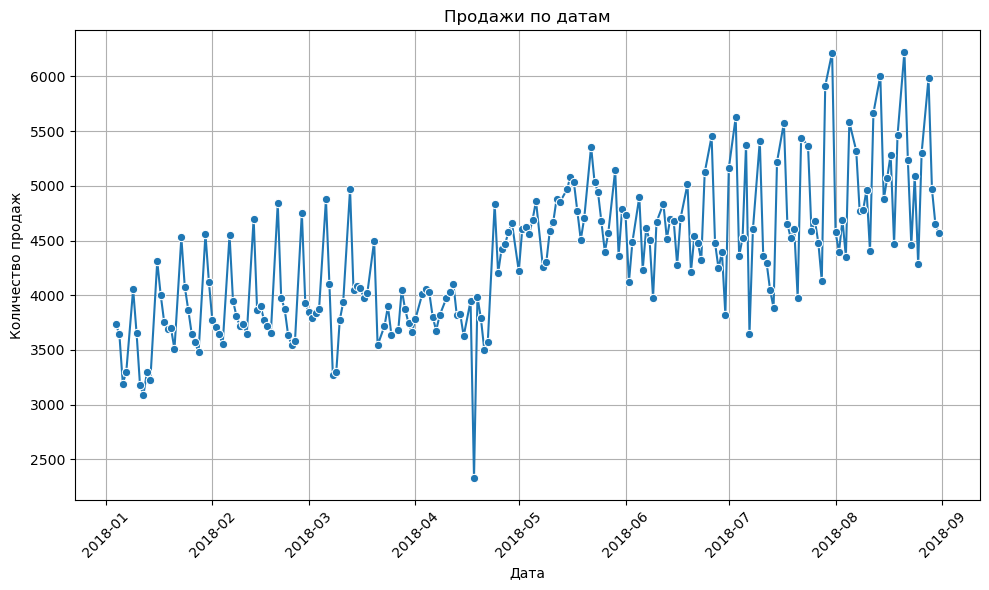

In [26]:
plt.figure(figsize=(10, 6))  # Размер графика
sns.lineplot(data=grouped_df, x='Дата', y='Количество', marker='o')

# Добавим подписи и заголовок
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

График показывает, что продажи не растут линейно и имеют рост и падения на протяжении времени. На графике можно заметить всплески продаж. Например, в некоторые дни количество продаж значительно увеличивается, что может указывать на сезонные изменения, акции, скидки или другие факторы

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [4]:
Q1 = df['Количество'].quantile(0.25)  # 25-й процентиль
Q3 = df['Количество'].quantile(0.75)  # 75-й процентиль
IQR = Q3 - Q1  # Интерквартильный размах

# 2. Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Находим выбросы
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

# 4. Находим строку с максимальным выбросом
max_outlier = outliers.loc[outliers['Количество'].idxmax()]

# Результат
print(max_outlier)

Дата             2018-06-28
Склад                     1
Контрагент      address_208
Номенклатура      product_0
Количество              200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [9]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
df = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Дата'].dt.weekday == 2)]
df_filtered = df[df['Склад'] == 3]
# Группировка по складу и товару, подсчет продаж
top_sales = df_filtered.groupby(df_filtered['Номенклатура'])['Количество'].sum().reset_index()

# Поиск топового товара по продажам для каждого склада
top_product = top_sales.loc[top_sales['Количество'].idxmax()]

# Результат
print(top_product)

Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [17]:
temp_data = pd.read_excel('temp_ast.xls', sheet_name='Архив Погоды rp5')
temp_data['Дата'] = pd.to_datetime(temp_data['Дата'])
temp_data_avg = temp_data.groupby('Дата')['Температура'].mean().reset_index()

In [21]:
merged_df = pd.merge(grouped_df, temp_data_avg, on='Дата', how='left')

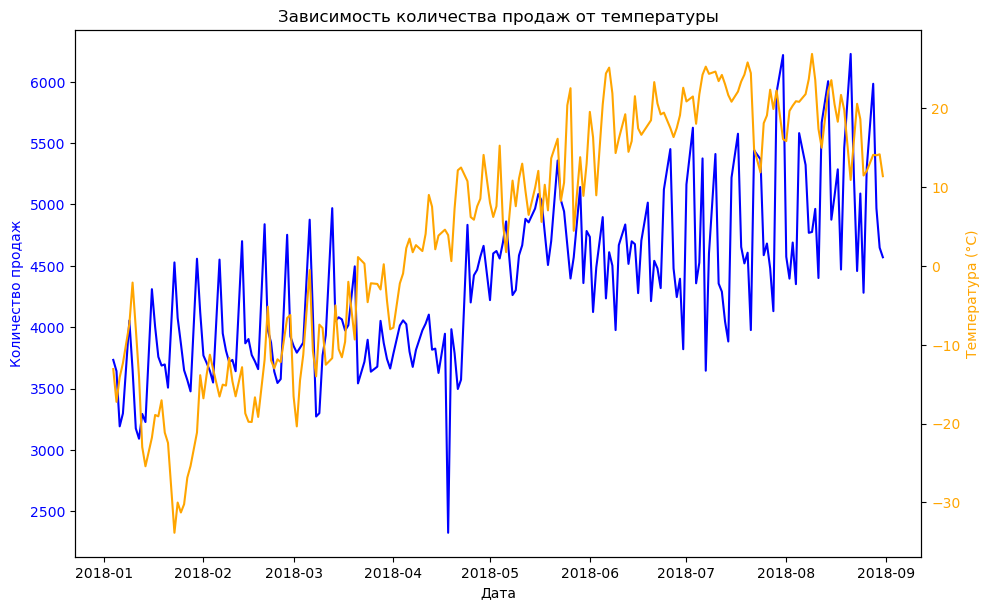

Text(0.5, 1.0, 'Температура за день')

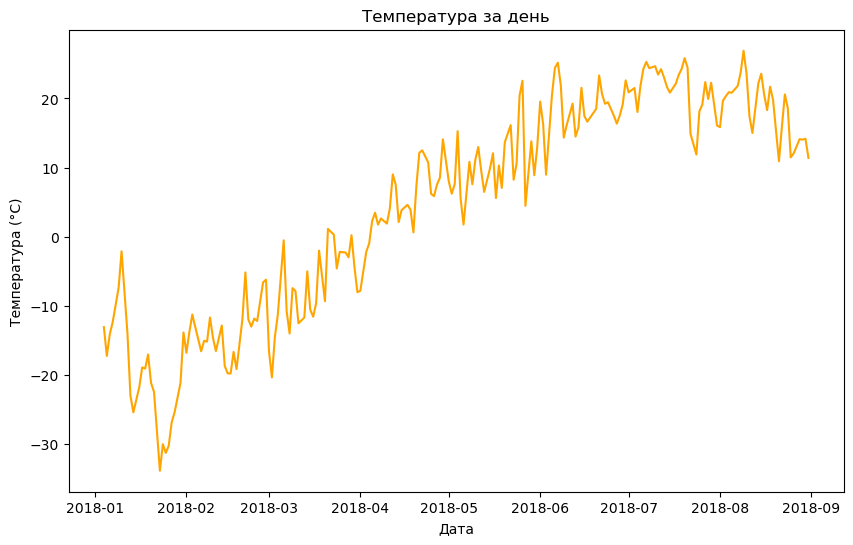

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Рисуем график для 'Количество продаж' (первый Y)
ax1.plot(merged_df['Дата'], merged_df['Количество'], label='Количество продаж', color='blue')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Создаем вторую ось Y для температуры
ax2 = ax1.twinx()  
ax2.plot(merged_df['Дата'], merged_df['Температура'], label='Температура (°C)', color='orange')
ax2.set_ylabel('Температура (°C)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Добавляем легенду
fig.tight_layout()  # Автоматически подгоняет элементы
plt.title('Зависимость количества продаж от температуры')
plt.xticks(rotation=45)  # Поворот меток на оси X
plt.show()

# Отдельно график температуры
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Дата'], merged_df['Температура'], label='Температура (°C)', color='orange')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.title('Температура за день')